In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels
import patsy
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import metrics

df = pd.read_excel('C://DATA_AOK3.xlsx')


In [12]:
df.dtypes

R     int64
Q1    int64
Q2    int64
Q3    int64
Q4    int64
Q5    int64
Q6    int64
Q7    int64
Q8    int64
Q9    int64
dtype: object

In [13]:
(df)

,R,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,1,4,4,3,4,3,3,3,5,4
1,2,5,4,5,4,4,5,5,5,4
2,3,4,3,4,4,3,5,2,4,4
3,4,4,4,4,4,4,3,3,5,4
4,5,5,4,4,4,4,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...
496,497,4,4,3,4,3,3,2,4,3
497,498,3,4,2,4,3,4,2,4,3
498,499,4,4,5,4,2,2,3,4,4
499,500,4,4,5,3,5,4,3,5,4


In [14]:
df.head()

,R,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,1,4,4,3,4,3,3,3,5,4
1,2,5,4,5,4,4,5,5,5,4
2,3,4,3,4,4,3,5,2,4,4
3,4,4,4,4,4,4,3,3,5,4
4,5,5,4,4,4,4,3,3,4,3


In [15]:
df.shape

(501, 10)

In [16]:
X = df.iloc[:, :-1].values
Tampilkan_X = pd.DataFrame(X) #visualisasi X
y = df.iloc[:, 4].values

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(), [3])],
        remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.float)

In [18]:
X = X[:, 1:]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
import statsmodels.api as sm
X_new = sm.add_constant(X)
X_opt = X_new[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01629
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.899
Time:                        12:23:45   Log-Likelihood:                -613.21
No. Observations:                 501   AIC:                             1230.
Df Residuals:                     499   BIC:                             1239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8007      0.050     75.886      0.000       3.702       3.899
x1            -0.0094      0.074     -0.128      0.899      -0.155       0.136
==============================================================================
Omnibus:                       34.932   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.322
Skew:                          -0.663   Prob(JB):                     1.75e-09
Kurtosis:                       3.417   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    jum_kol = len(x[0])
    for i in range(0, jum_kol):
        regressor_OLS = sm.OLS(endog = y, exog = x).fit()
        p_val = regressor_OLS.pvalues.astype(float)
        max_index = np.argmax(p_val, axis = 0)
        nilai_max = max(regressor_OLS.pvalues).astype(float)
        if nilai_max > sl:
            x = np.delete(x, max_index, 1)
    print(regressor_OLS.summary())
 
SL = 0.05
X_new = sm.add_constant(X)
X_opt = X_new[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.64
Date:                Sun, 17 Oct 2021   Prob (F-statistic):            0.00118
Time:                        12:23:49   Log-Likelihood:                -607.93
No. Observations:                 501   AIC:                             1220.
Df Residuals:                     499   BIC:                             1228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0028      0.073     54.825      0.0

In [24]:
# STYLE 1
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
 
# STYLE 2
regressor_OLS = sm.OLS(endog = y, exog = X_opt)
hasil = regressor_OLS.fit()
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.696
Date:                Sun, 17 Oct 2021   Prob (F-statistic):            0.00271
Time:                        12:23:51   Log-Likelihood:                -604.03
No. Observations:                 501   AIC:                             1220.
Df Residuals:                     495   BIC:                             1245.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2252      0.474      6.798      0.000       2.293       4.157
x1             0.5275      0.495      1.066      0.287      -0.444       1.499
x2             0.7746      0.473      1.636      0.102      -0.155       1.705
x3             0.7690      0.472      1.628      0.104      -0.159       1.697
x4             0.9337      0.480      1.946      0.052      -0.009       1.876
x5            -0.0008      0.000     -3.220      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       33.599   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.551
Skew:                          -0.645   Prob(JB):                     4.25e-09
Kurtosis:                       3.428   Cond. No.                     8.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

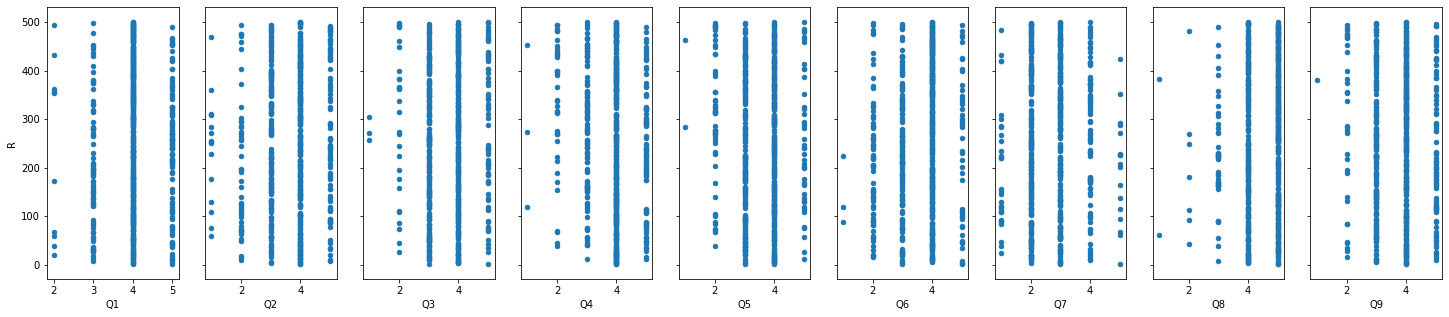

In [27]:
fig, axs = plt.subplots(1, 9, sharey=True)
df.plot(kind='scatter', x='Q1', y='R', ax=axs[0], figsize=(25,5))
df.plot(kind='scatter', x='Q2', y='R', ax=axs[1])
df.plot(kind='scatter', x='Q3', y='R', ax=axs[2])
df.plot(kind='scatter', x='Q4', y='R', ax=axs[3])
df.plot(kind='scatter', x='Q5', y='R', ax=axs[4])
df.plot(kind='scatter', x='Q6', y='R', ax=axs[5])
df.plot(kind='scatter', x='Q7', y='R', ax=axs[6])
df.plot(kind='scatter', x='Q8', y='R', ax=axs[7])
df.plot(kind='scatter', x='Q9', y='R', ax=axs[8])

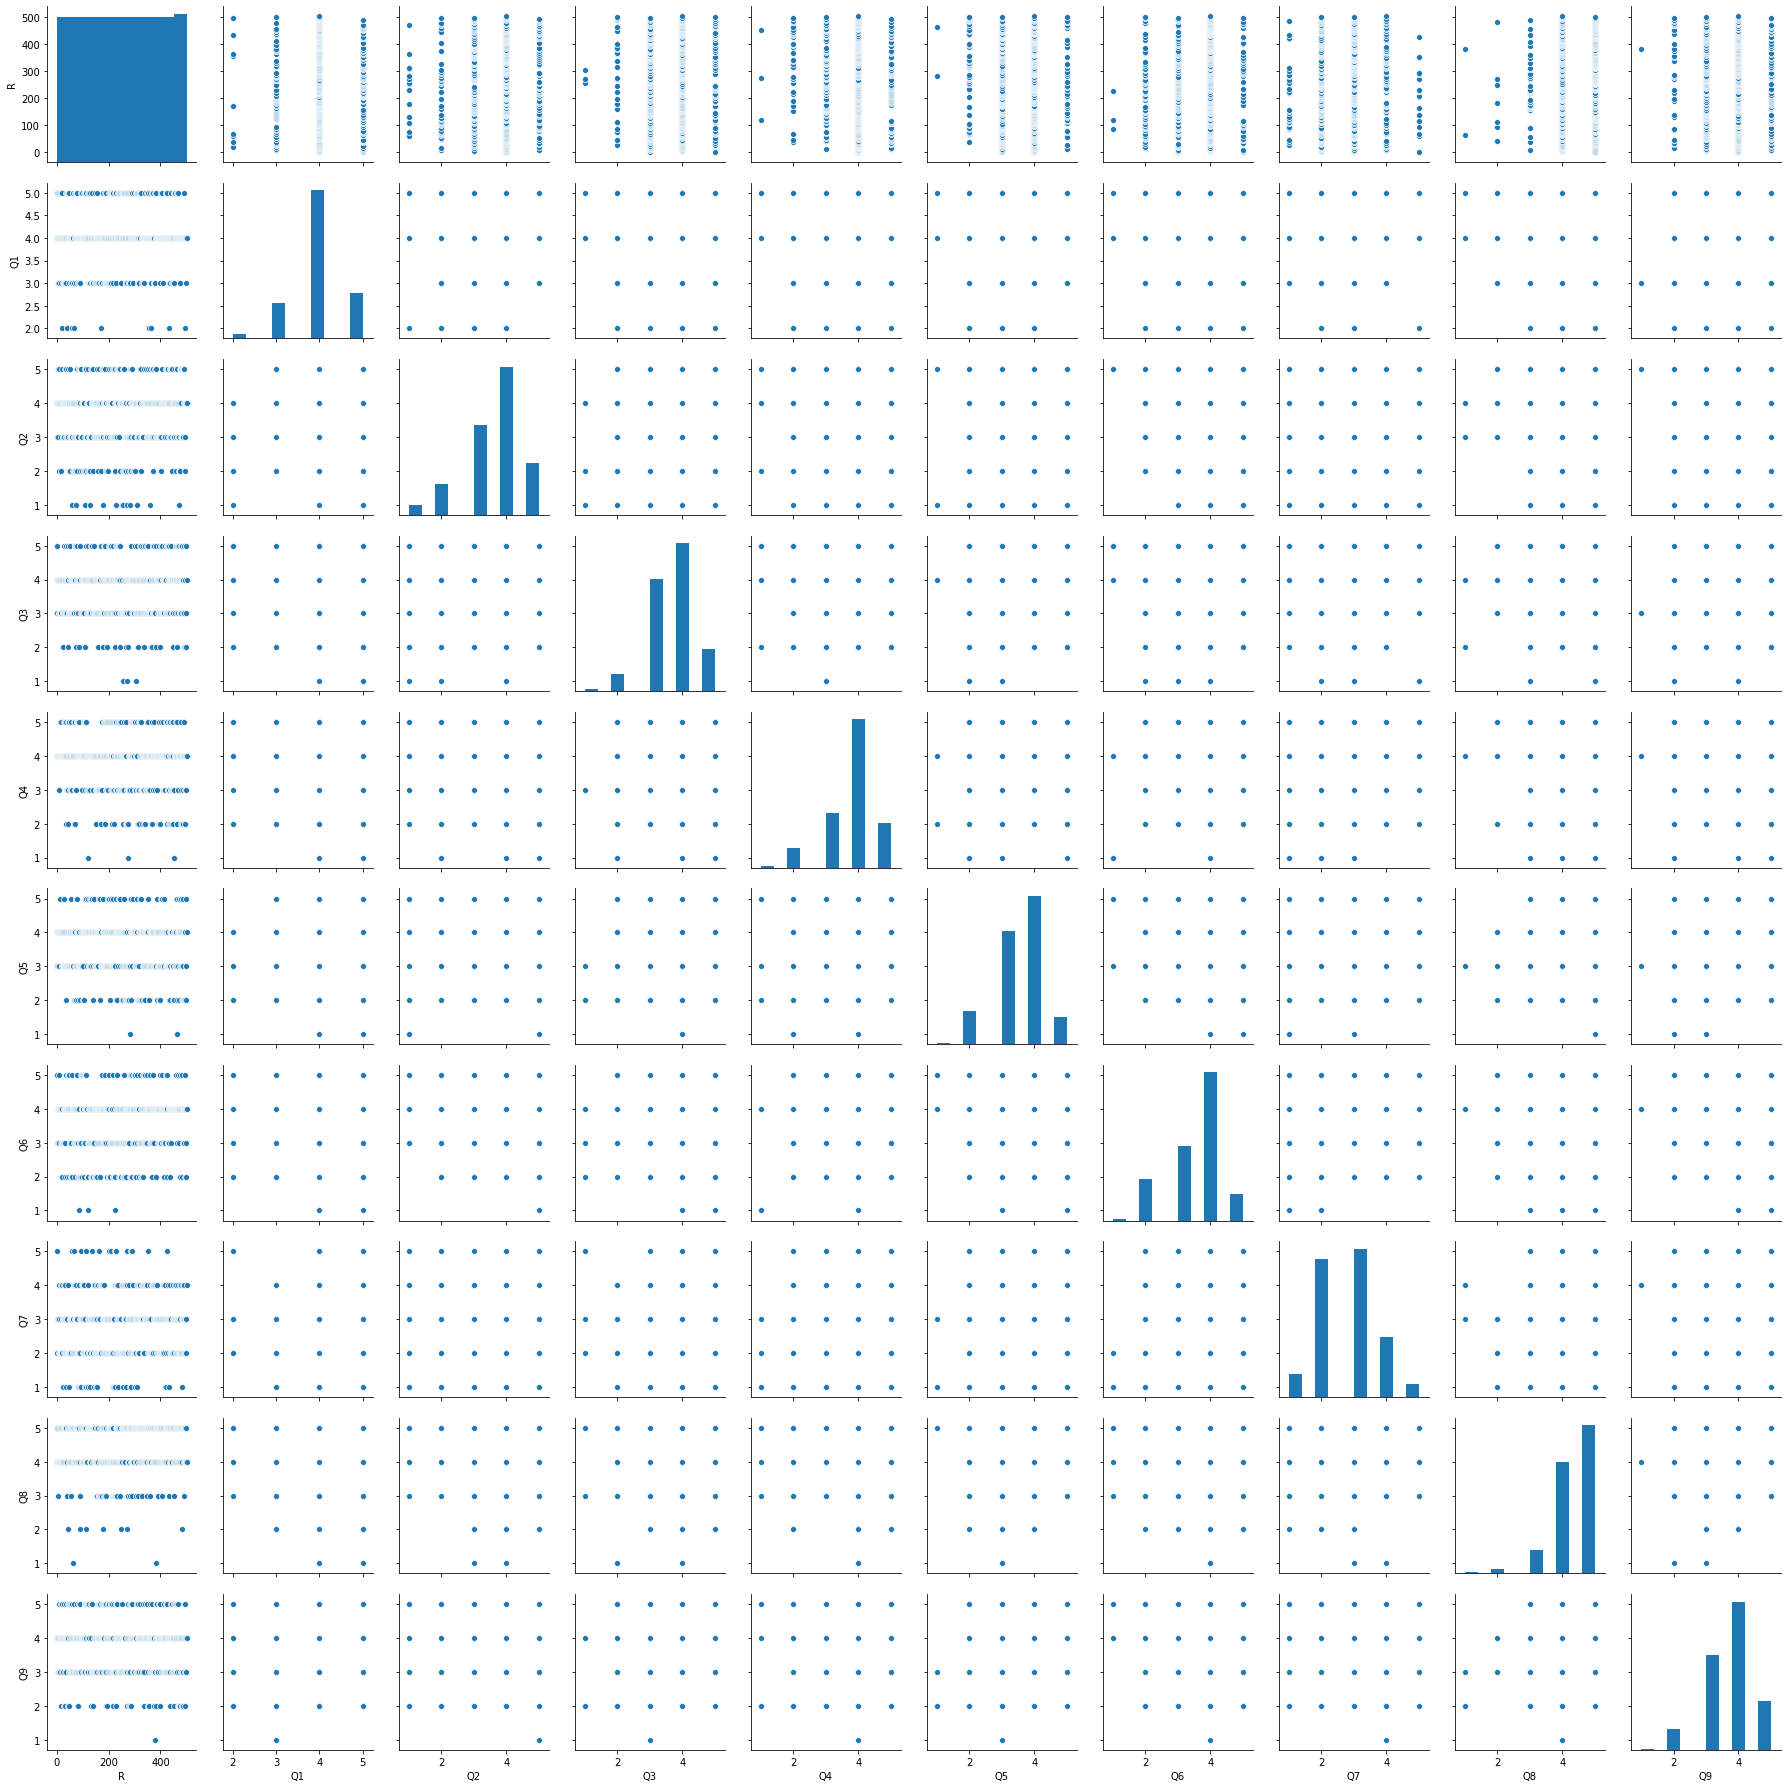

In [28]:
sns.pairplot(df)

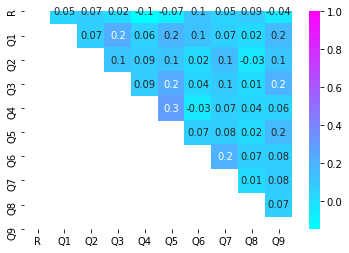

In [29]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

In [30]:
X = df.drop(['R'], axis=1)
y = df['R']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(350, 9) (350,) (151, 9) (151,)


In [ ]:
# Mengimpor library yang diperlukan
# Mengimpor dataset
# Encode data kategori
# Menghindari jebakan dummy variabel
# Membagi data menjadi the Training set and Test set
# Membuat model Multiple Linear Regression dari Training set
# Memprediksi hasil Test set 
# Memilih model multiple regresi yang paling baik dengan metode backward propagation
